In [10]:
import numpy as np
import pandas as pd
import plotly
import plotly.express as px
import sklearn
from sklearn import metrics
from data_utils import load_dataset, core_metrics, map_model

import plotly.io as pio
# set this to 'jupyterlab' for interactive
pio.renderers.default = "png" 

In [2]:
X_train, X_test, y_train, y_test, X_scaler = load_dataset(scale=True,one_hot=True,categorize_bedrooms=True)

X Columns: {} Index(['date', 'latitude', 'longitude', 'area', 'pets', 'furnished',
       'unit_type_apartment', 'unit_type_condo', 'unit_type_house',
       'unit_type_townhouse', 'bedrooms_0.0', 'bedrooms_1.0', 'bedrooms_2.0',
       'bedrooms_3.0', 'bedrooms_4.0', 'bedrooms_5.0', 'bedrooms_6.0',
       'bedrooms_7.0', 'bedrooms_8.0'],
      dtype='object')
X Shape: (306414, 19)
y Shape: (306414, 1)


In [3]:
from sklearn import neighbors

In [4]:
knn = neighbors.KNeighborsRegressor(n_neighbors=50,)
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                    weights='uniform')

Mean Absolute Error: 300
Median Absolute Error: 196
Explained Variance: 0.81


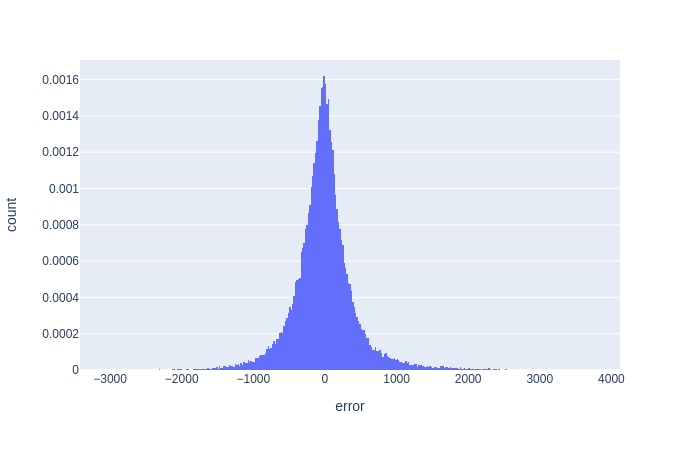

In [11]:
y_pred = knn.predict(X_test)
core_metrics(y_test,y_pred)

Using cached coordinates


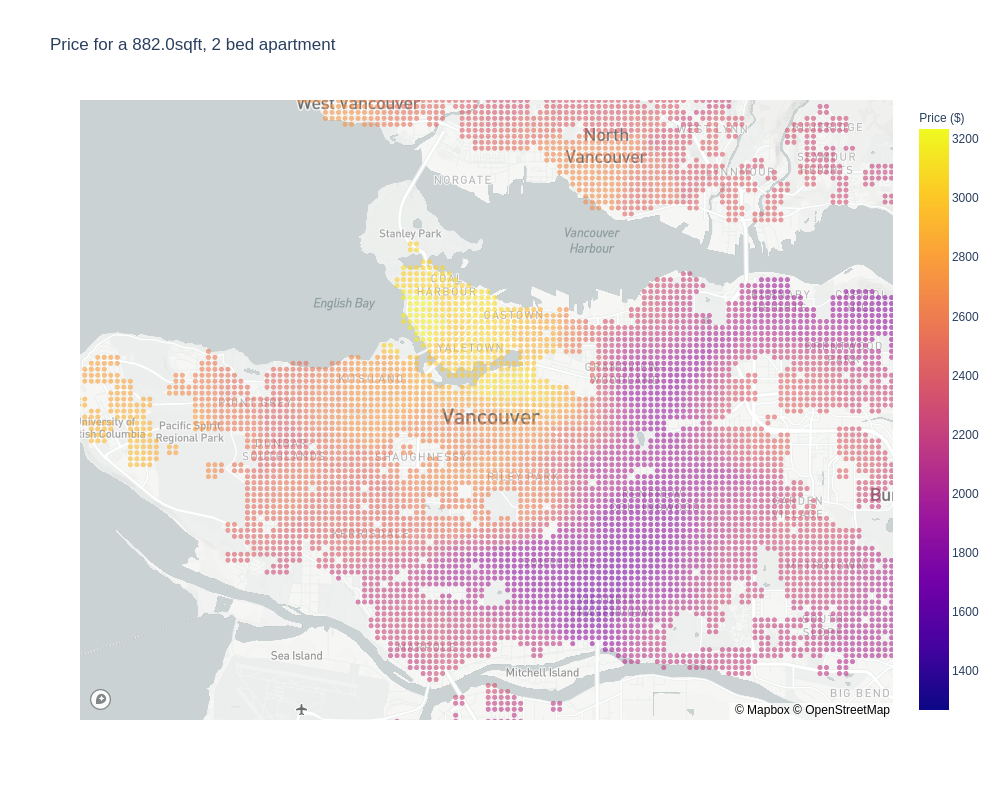

In [8]:
fig = map_model(X_train,knn,scaler=X_scaler)
fig.show(height=800,width=1000)